In [1]:
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *
import urllib.request
import os

In [3]:
path = Path('data')

In [4]:
fns = get_image_files(path)
fns

(#13000) [Path(&#39;data/s_constellatus/aug_925.jpg&#39;),Path(&#39;data/s_constellatus/aug_285.jpg&#39;),Path(&#39;data/s_constellatus/aug_431.jpg&#39;),Path(&#39;data/s_constellatus/aug_161.jpg&#39;),Path(&#39;data/s_constellatus/aug_578.jpg&#39;),Path(&#39;data/s_constellatus/aug_813.jpg&#39;),Path(&#39;data/s_constellatus/aug_884.jpg&#39;),Path(&#39;data/s_constellatus/aug_72.jpg&#39;),Path(&#39;data/s_constellatus/aug_834.jpg&#39;),Path(&#39;data/s_constellatus/aug_427.jpg&#39;)...]

In [5]:
failed = verify_images(fns)
failed

&lt;IPython.core.display.HTML object&gt;

(#0) []

In [6]:
failed.map(Path.unlink);

## From Data to DataLoaders

In [7]:
fishes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [8]:
dls = fishes.dataloaders(path)

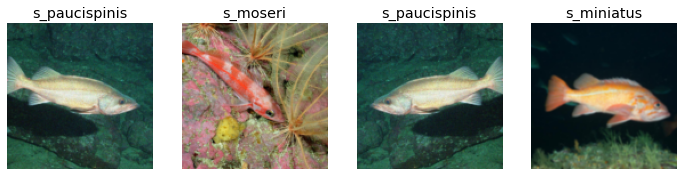

In [9]:
dls.valid.show_batch(max_n=4, nrows=1)

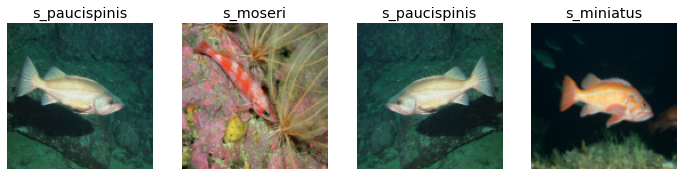

In [10]:
fishes = fishes.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = fishes.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

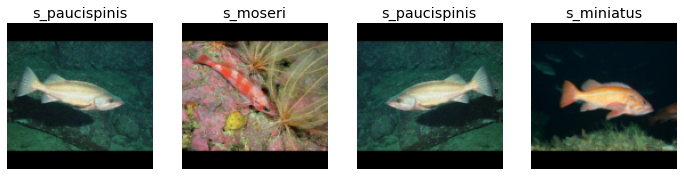

In [11]:
fishes = fishes.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = fishes.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

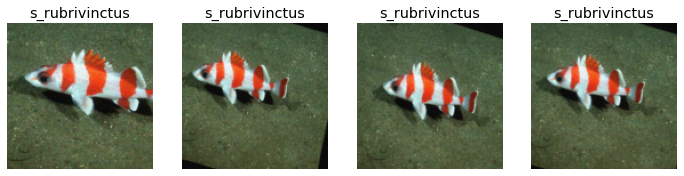

In [12]:
fishes = fishes.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = fishes.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

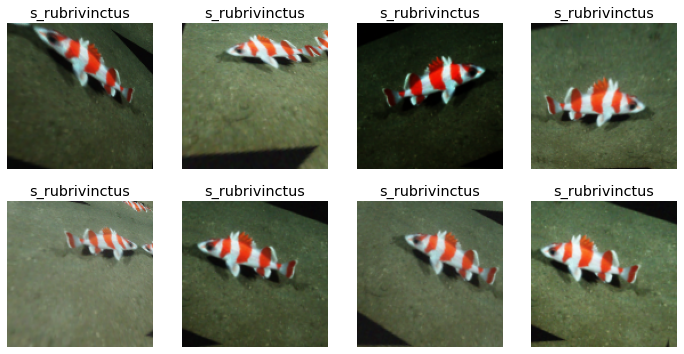

In [13]:
fishes = fishes.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = fishes.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

## Training The Model

In [14]:
fishes = fishes.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = fishes.dataloaders(path)

We can now create our `Learner` and fine-tune it in the usual way:

In [15]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

&lt;IPython.core.display.HTML object&gt;

epoch,train_loss,valid_loss,error_rate,time
0,0.067093,0.019065,0.009615,01:03
1,0.032310,0.066354,0.015000,01:04
2,0.026088,0.040968,0.015769,01:04
3,0.015063,0.046105,0.015769,01:03


## Measuring the Model

&lt;IPython.core.display.HTML object&gt;

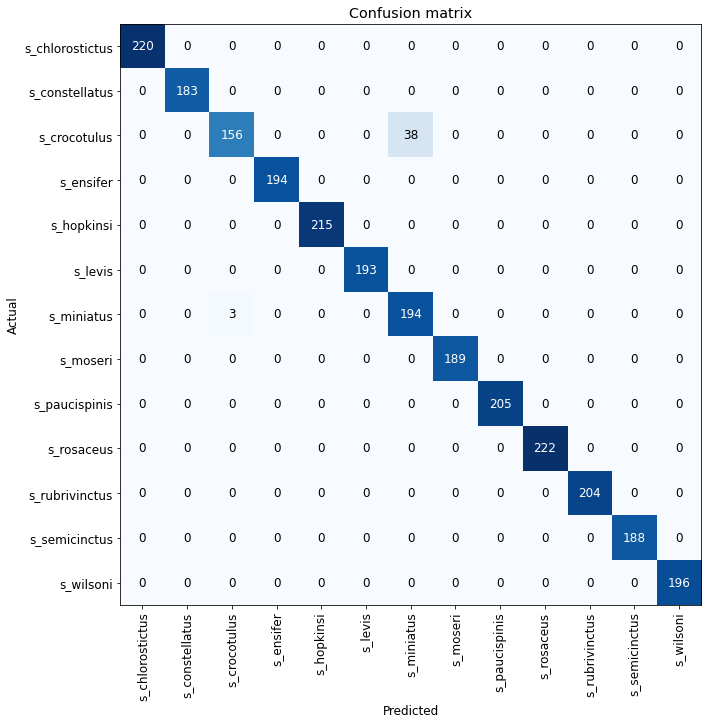

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(10,10))

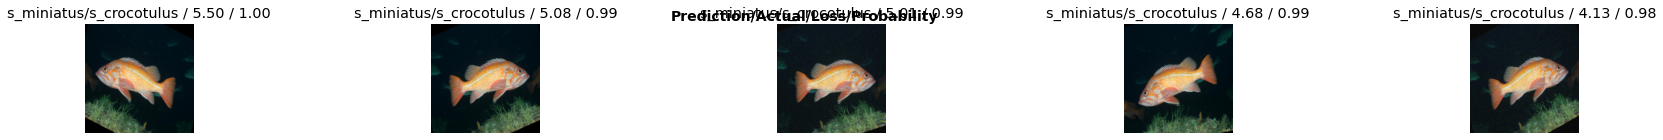

In [22]:
interp.plot_top_losses(5, nrows=1)

### Exporting the Model

In [18]:
learn.export()

In [19]:
learn_inf = load_learner('export.pkl')